In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import array
%matplotlib inline
import pandas as pd
bjhp =pd.read_csv('new.csv',encoding = 'GB2312',low_memory=False)
print(bjhp.shape[0])

318851


In [2]:
bjhp

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [3]:
bjhp.isnull().sum(axis=0)

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

In [4]:
bjhp['DOM'].fillna(bjhp['DOM'].median(),inplace=True)
bjhp=bjhp.dropna(axis=0, how='any')

In [5]:
bjhp.isnull().sum(axis=0)

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [6]:
print(bjhp.shape[0])

316448


In [7]:
bjhp['floor']=bjhp['floor'].map(lambda x:x.split(' ')[1]).astype('int64')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
bjhp['constructionTime'].value_counts()
bjhp=bjhp[~bjhp['constructionTime'].isin(['未知'])]

In [9]:
bjhp['livingRoom']=bjhp['livingRoom'].astype('int64')
bjhp['drawingRoom']=bjhp['drawingRoom'].astype('int64')
bjhp['bathRoom']=bjhp['bathRoom'].astype('int64')
bjhp['constructionTime']=bjhp['constructionTime'].astype('int64')
bjhp['buildingType']=bjhp['buildingType'].astype('int64')

In [10]:
bjhp['district'] = bjhp['district'].apply(lambda x: "DongCheng" if x == 1 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "FengTai" if x == 2 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "YiZhuang" if x == 3 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "DaXing" if x == 4 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "FangShan" if x == 5 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "ChangPing" if x == 6 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "ChaoYang" if x == 7 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "HaiDian" if x == 8 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "ShiJingShan" if x == 9 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "XiCheng" if x == 10 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "TongZhou" if x == 11 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "ShunYi" if x == 12 else x)
bjhp['district'] = bjhp['district'].apply(lambda x: "MenTouGou" if x == 13 else x)
print(bjhp)

                                                      url            id  \
0       https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
1       https://bj.lianjia.com/chengjiao/101086012217....  101086012217   
2       https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3       https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4       https://bj.lianjia.com/chengjiao/101086920653....  101086920653   
...                                                   ...           ...   
318845  https://bj.lianjia.com/chengjiao/BJYZ92303482....  BJYZ92303482   
318846  https://bj.lianjia.com/chengjiao/BJYZ92311192....  BJYZ92311192   
318847  https://bj.lianjia.com/chengjiao/BJYZ92320171....  BJYZ92320171   
318848  https://bj.lianjia.com/chengjiao/BJYZ92324217....  BJYZ92324217   
318849  https://bj.lianjia.com/chengjiao/BJYZ92333313....  BJYZ92333313   

               Lng        Lat            Cid   tradeTime     DOM  followers  \
0       116.475489  

In [11]:
bjhp['tradeTime'] = pd.to_datetime(bjhp['tradeTime'])
bjhp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 0 to 318849
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   url                  297701 non-null  object        
 1   id                   297701 non-null  object        
 2   Lng                  297701 non-null  float64       
 3   Lat                  297701 non-null  float64       
 4   Cid                  297701 non-null  int64         
 5   tradeTime            297701 non-null  datetime64[ns]
 6   DOM                  297701 non-null  float64       
 7   followers            297701 non-null  int64         
 8   totalPrice           297701 non-null  float64       
 9   price                297701 non-null  int64         
 10  square               297701 non-null  float64       
 11  livingRoom           297701 non-null  int64         
 12  drawingRoom          297701 non-null  int64         
 13  kitchen       

In [12]:
print(bjhp.shape[0])

297701


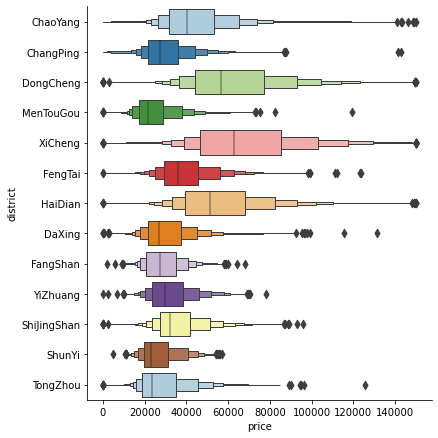

In [13]:
sns.catplot(x='price',y='district',kind='boxen',height=6, 
           data=bjhp,palette=sns.color_palette("Paired",13))  

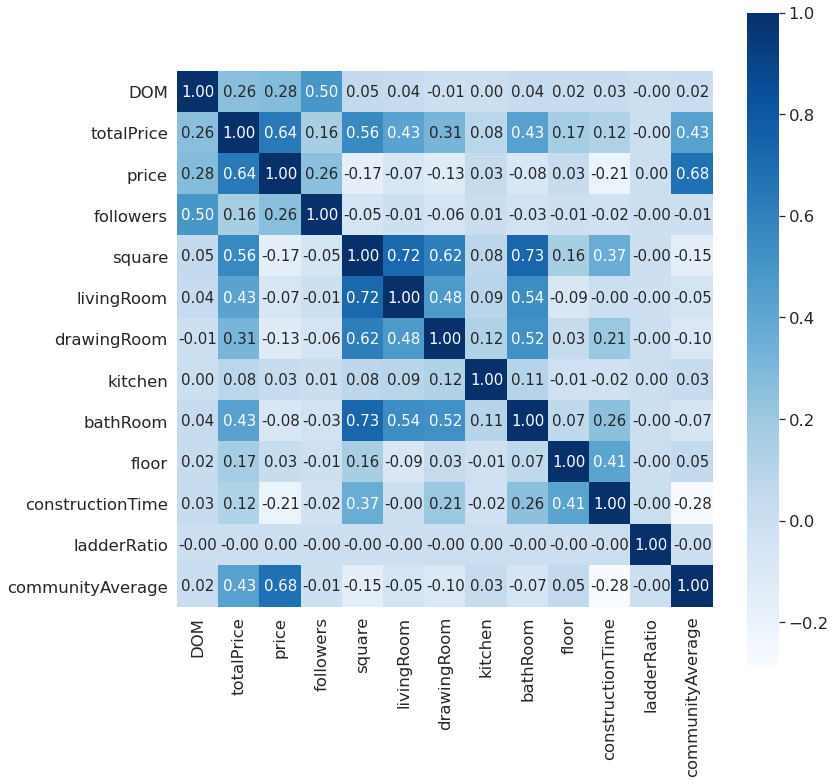

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='whitegrid', context='notebook')
cols = ['DOM','totalPrice','price','followers','square','livingRoom','drawingRoom','kitchen','bathRoom','floor','constructionTime','ladderRatio','communityAverage']
cm = np.corrcoef(bjhp[cols],rowvar=0)
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Blues')
plt.show()

In [15]:
avgprice=pd.DataFrame(data=bjhp.resample('1M',on='tradeTime')['price'].mean())
avgprice['count']=bjhp.resample('1M',on='tradeTime')['id'].count()
avgprice=avgprice.dropna(axis=0, how='any')
avgprice['count']=avgprice['count'].astype('int64')

In [16]:
avgprice.index

DatetimeIndex(['2002-06-30', '2002-07-31', '2003-07-31', '2009-01-31',
               '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30',
               ...
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31'],
              dtype='datetime64[ns]', name='tradeTime', length=101, freq=None)

In [17]:
avgprice=avgprice[4:]

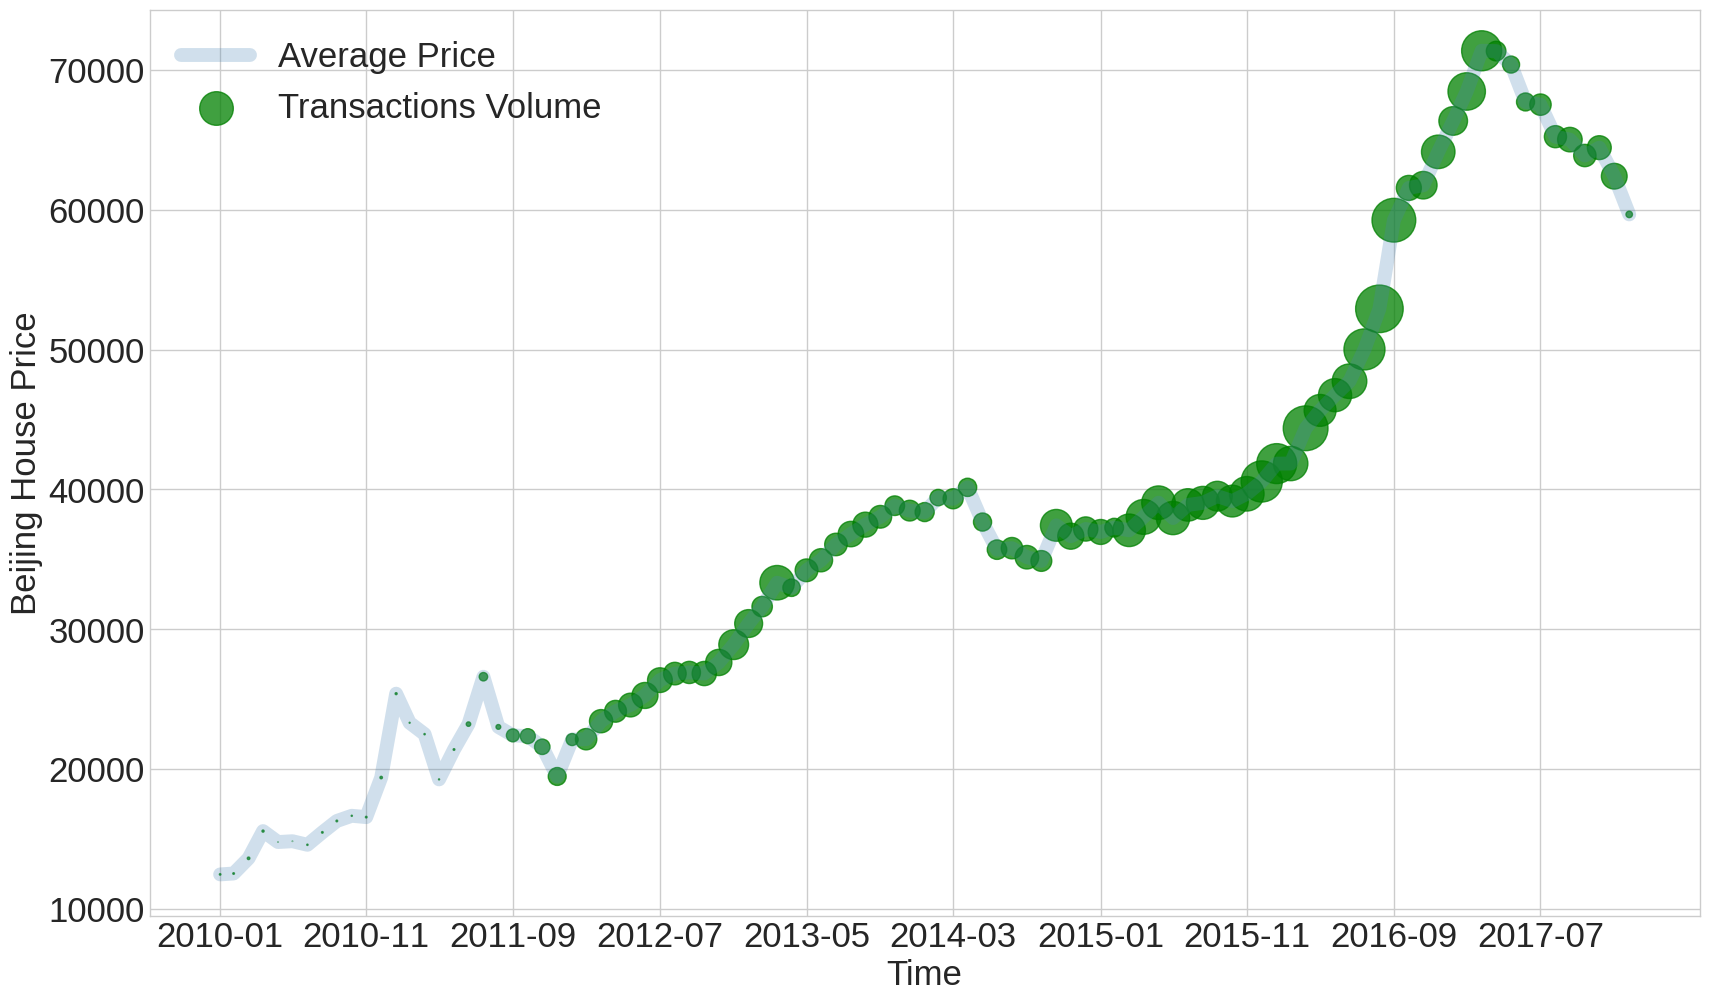

In [18]:
import matplotlib.dates as mdate
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,12),dpi=100)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(avgprice.index[0],avgprice.index[-1],freq='10M'),fontsize=25)
plt.yticks(fontsize=25)
plt.plot(avgprice.index,avgprice['price'], color="steelblue", linewidth=10, alpha=.25, label = 'Average Price')
plt.scatter(avgprice.index, avgprice['price'],s=avgprice['count']/10,color="green",alpha=.75, label = "Transactions Volume")
plt.legend(fontsize=25)
plt.xlabel("Time", fontsize = 25)
plt.ylabel("Beijing House Price", fontsize = 25)
plt.show()

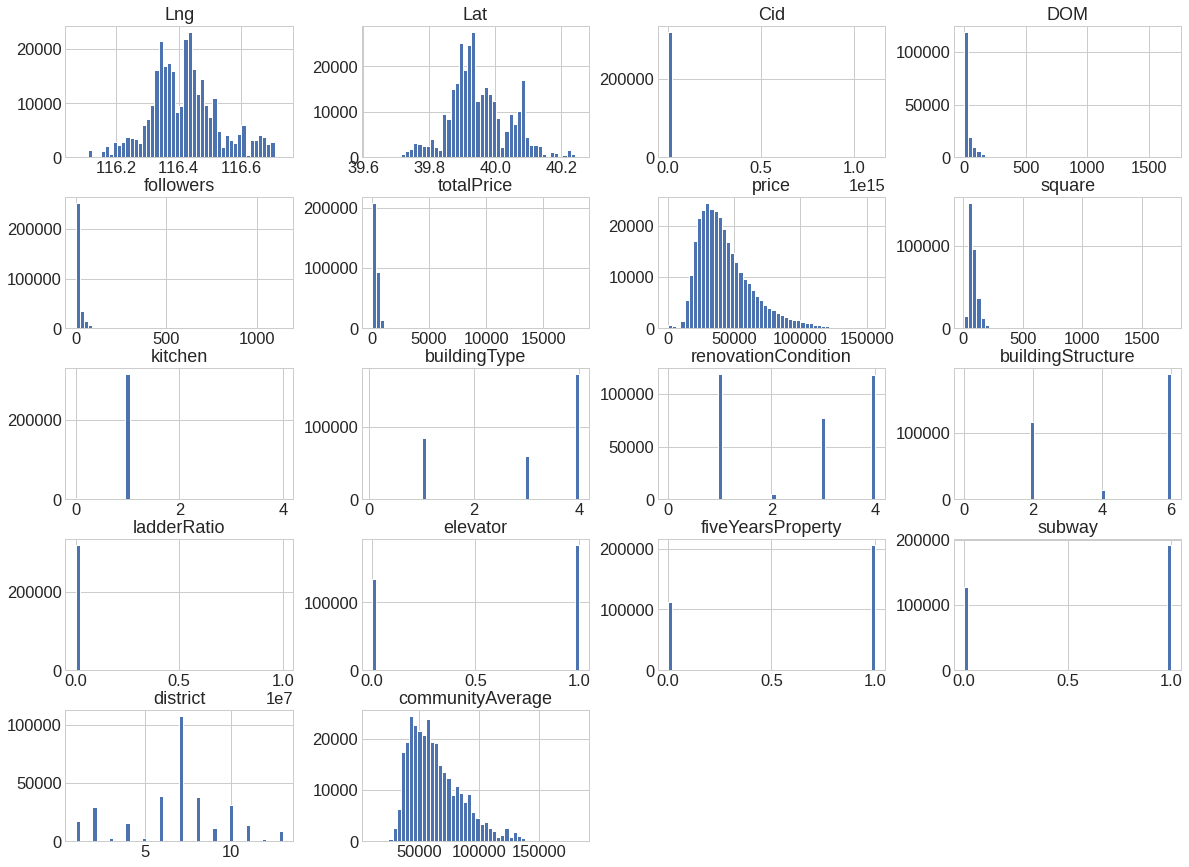

In [19]:
houses = pd.read_csv('new.csv', encoding= 'unicode_escape', low_memory=False)
houses.head()
%matplotlib inline
import matplotlib.pyplot as plt
houses.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [20]:
from math import sqrt
from math import cos
from math import sin
import math

def rad(d):
    return d * math.pi / 180.0
 
def getDistance(lat1, lng1, lat2, lng2):
    EARTH_REDIUS = 6378.137
    radLat1 = rad(lat1)
    radLat2 = rad(lat2)
    a = radLat1 - radLat2
    b = rad(lng1) - rad(lng2)
    s = 2 * math.asin(math.sqrt(math.pow(sin(a/2), 2) + cos(radLat1) * cos(radLat2) * math.pow(sin(b/2), 2)))
    s = s * EARTH_REDIUS
    return s

In [21]:
bjhp=bjhp[bjhp['tradeTime']>'2010']
bjhp['c_distance']=bjhp.apply(lambda x :getDistance(x['Lat'],x['Lng'], 39.5427,116.2317),axis=1)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# regression

In [22]:
feature_cols=['DOM','followers','square','livingRoom','drawingRoom','kitchen','bathRoom','floor','constructionTime','elevator','ladderRatio','communityAverage','fiveYearsProperty','subway','c_distance']

In [23]:
def classify_values(bjhp,column_name):
    temp=pd.DataFrame(bjhp[column_name].value_counts())
    
    for index in temp.index: 
        if index==2:
            continue
        bjhp[column_name+str(index)]=bjhp[column_name].apply(lambda x: 1 if x==index else 0)
        feature_cols.append(column_name+str(index))

In [24]:
classify_values(bjhp,'renovationCondition')
classify_values(bjhp,'buildingStructure')
classify_values(bjhp,'buildingType')
classify_values(bjhp,'district')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
bjhp['tradeTime'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2016-08-09
1        2016-07-28
2        2016-12-11
3        2016-09-30
4        2016-08-28
            ...    
318845   2016-06-09
318846   2016-06-10
318847   2016-06-10
318848   2016-06-05
318849   2016-06-12
Name: tradeTime, Length: 297695, dtype: datetime64[ns]>

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from scipy import stats
X = bjhp[feature_cols]
y = bjhp[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

LinearRegression()

In [27]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.000e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:07:54   Log-Likelihood:            -2.4355e+06
No. Observations:              223271   AIC:                         4.871e+06
Df Residuals:                  223232   BIC:                         4.871e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.057e+04 

In [28]:
y_pred = linreg.predict(X_test)

In [29]:
from sklearn import metrics
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 179454633.17940453
RMSE: 13396.067825276361


In [30]:
y_avgreg=pd.DataFrame(linreg.predict(X))

In [31]:
bjhp.index = range(len(bjhp))
y_avgreg.columns=['regPrice']
y_avgreg['tradeTime']=bjhp['tradeTime']
y_avgreg

,regPrice,tradeTime
0,179164.532532,2016-08-09
1,138482.910819,2016-07-28
2,152242.650234,2016-12-11
3,121522.961020,2016-09-30
4,146972.413075,2016-08-28
...,...,...
297690,22504.352568,2016-06-09
297691,9058.971507,2016-06-10
297692,30165.016546,2016-06-10
297693,30904.539798,2016-06-05


In [32]:
y_avgreg=pd.DataFrame(data=y_avgreg.resample('1M',on='tradeTime')['regPrice'].mean())

y_avgreg.head()

,regPrice
tradeTime,
2010-01-31,22938.234313
2010-02-28,23088.601471
2010-03-31,23235.987774
2010-04-30,22182.342108
2010-05-31,23215.441083


In [33]:
y_truth=pd.DataFrame(data=bjhp.resample('1M',on='tradeTime')['price'].mean())
y_truth

,price
tradeTime,
2010-01-31,12354.454545
2010-02-28,12529.857143
2010-03-31,13616.941176
2010-04-30,15563.583333
2010-05-31,14780.000000
...,...
2017-09-30,65014.699135
2017-10-31,63876.753668
2017-11-30,64439.586883


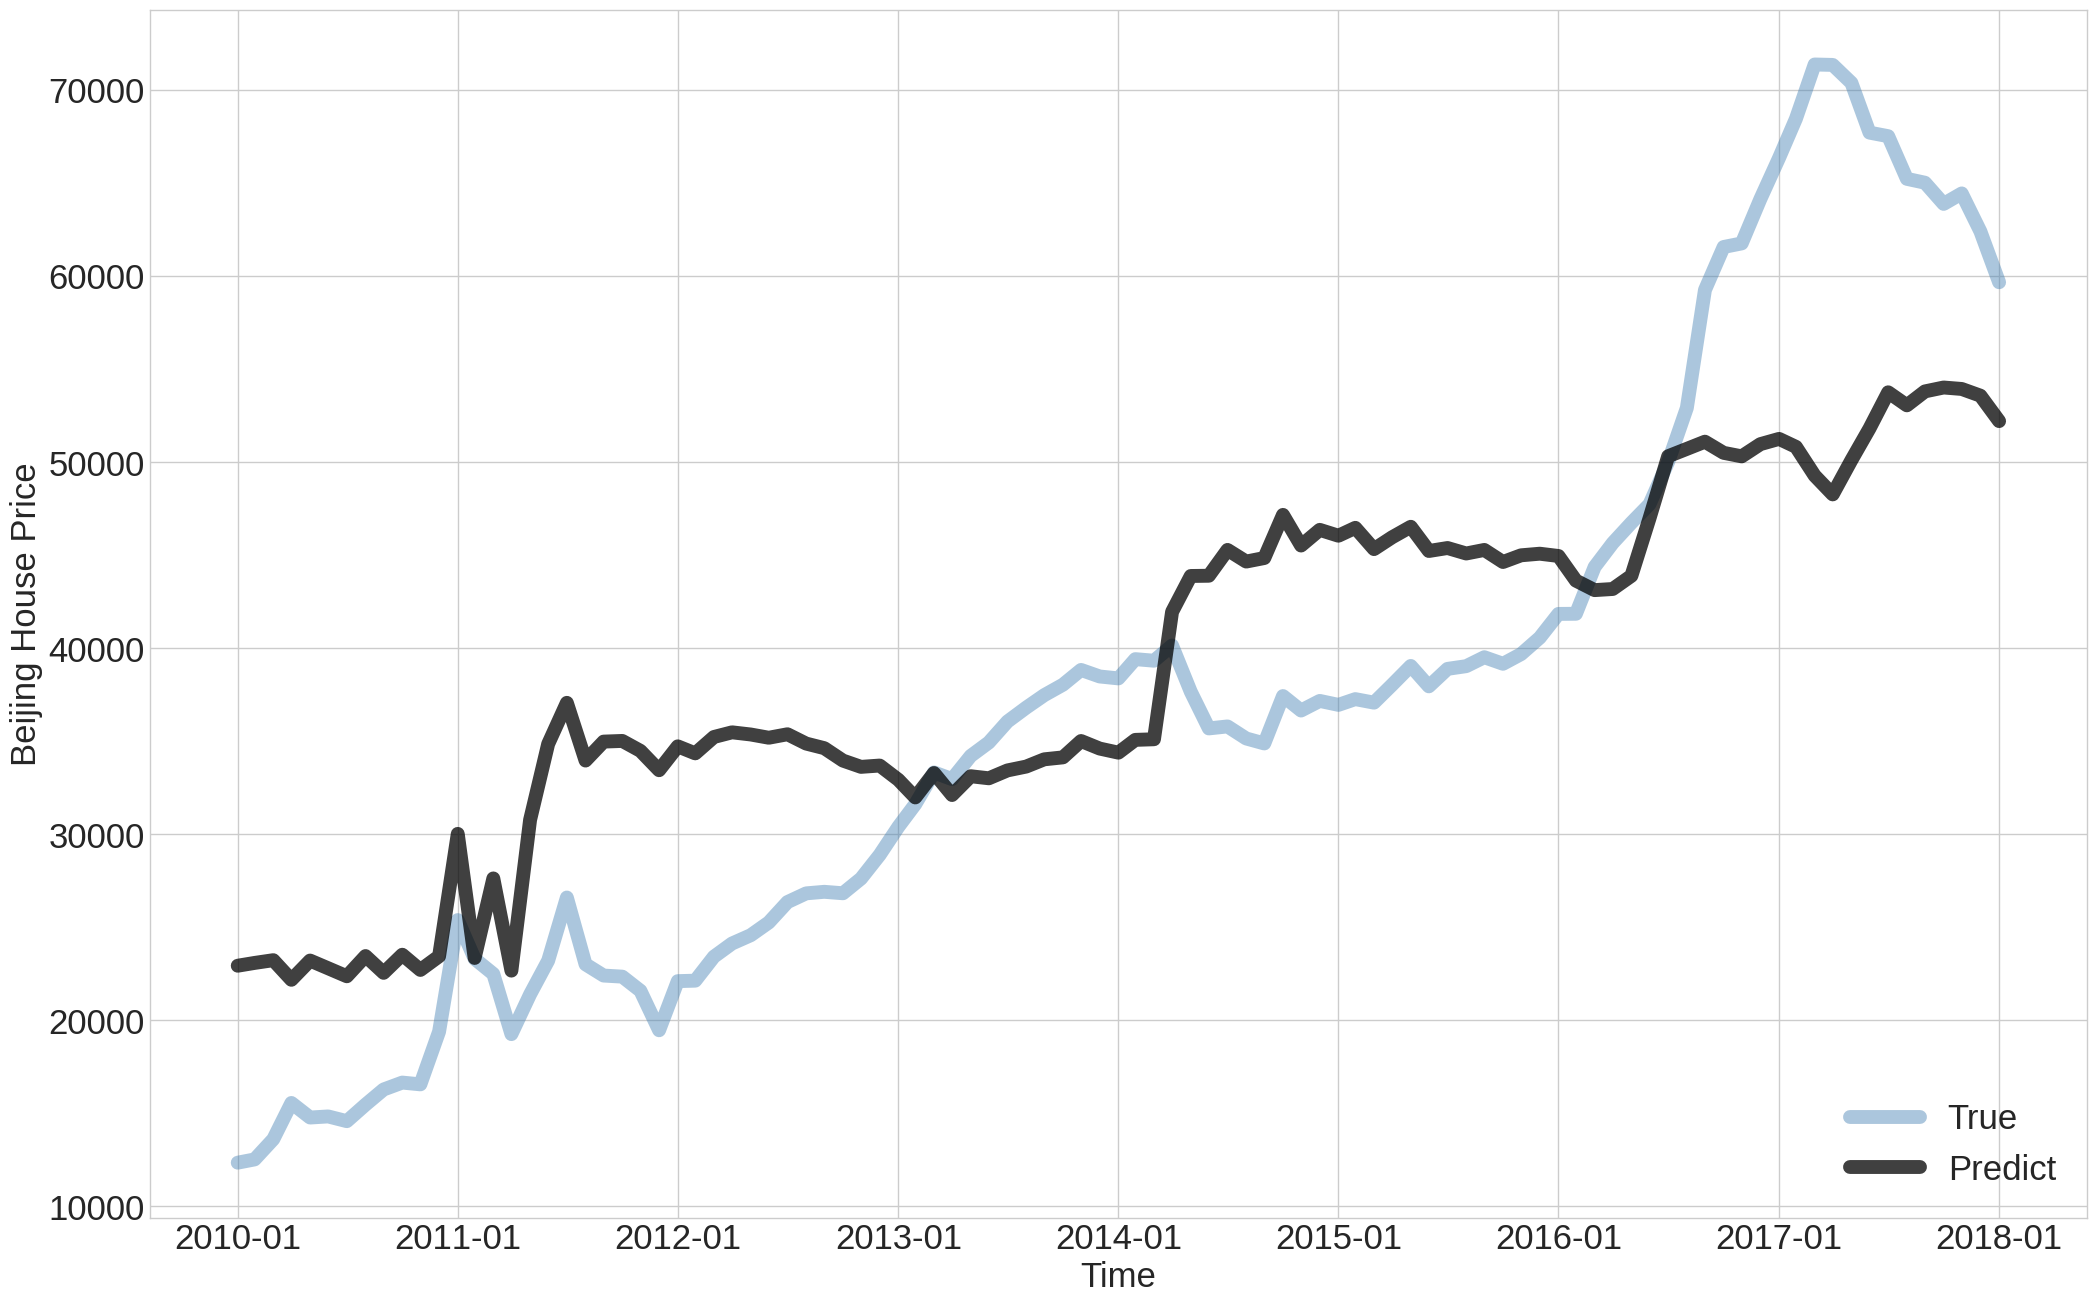

In [34]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,16),dpi=100)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(y_truth.index[0],y_truth.index[-1],freq='12M'),fontsize=25)
plt.yticks(fontsize=25)
plt.plot(y_truth.index,y_truth['price'],color="steelblue",linewidth=10, alpha=.45,label='True')
plt.plot(y_avgreg.index, y_avgreg['regPrice'],color="black",linewidth=10,alpha=.75,label='Predict')
plt.legend(loc="lower right",fontsize=25)
plt.xlabel("Time",fontsize=25)
plt.ylabel("Beijing House Price",fontsize=25)
plt.show()

In [35]:
data=bjhp[~bjhp['buildingStructure'].isin([1])]
data=bjhp[~bjhp['renovationCondition'].isin([1])]
#data_2015=data[data['tradeTime']>'2015']
#data_2015=data_2015[data_2015['tradeTime']<'2016']
data_2015=bjhp
data_2015.index=range(len(data_2015))

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = data_2015[feature_cols[:15]]
y = data_2015[['price']]
selector=RFE(estimator=LinearRegression(), n_features_to_select=15)

In [37]:
selector.fit_transform(X, y)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [38]:
features=[]
for index,value in enumerate(selector.get_support()):
    if value==True:
        features.append(feature_cols[index])
features.append(feature_cols[15])
features.append(feature_cols[17])
features=features+feature_cols[18:22]
features=features+feature_cols[23:]
X = data_2015[features]

In [39]:
X.drop(['DOM'],axis=1,inplace=True)
X.drop(['buildingStructure3'],axis=1,inplace=True)
X.drop(['buildingStructure6'],axis=1,inplace=True)
X.drop(['buildingStructure4'],axis=1,inplace=True)
X.drop(['buildingStructure5'],axis=1,inplace=True)
X.drop(['buildingType1'],axis=1,inplace=True)
X.drop(['buildingType3'],axis=1,inplace=True)
X.drop(['buildingType4'],axis=1,inplace=True)
X.drop(['districtHaiDian'],axis=1,inplace=True)
X.drop(['districtXiCheng'],axis=1,inplace=True)
X.drop(['districtFengTai'],axis=1,inplace=True)
X.drop(['districtDongCheng'],axis=1,inplace=True)
X.drop(['districtDaXing'],axis=1,inplace=True)
X.drop(['districtTongZhou'],axis=1,inplace=True)
X.drop(['districtChangPing'],axis=1,inplace=True)
X.drop(['districtShiJingShan'],axis=1,inplace=True)
X.drop(['districtMenTouGou'],axis=1,inplace=True)
X.drop(['districtYiZhuang'],axis=1,inplace=True)
X.drop(['districtChaoYang'],axis=1,inplace=True)
X.drop(['districtShunYi'],axis=1,inplace=True)
X.drop(['districtFangShan'],axis=1,inplace=True)
X.drop(['kitchen'],axis=1,inplace=True)
X.drop(['ladderRatio'],axis=1,inplace=True)
X.drop(['renovationCondition4'],axis=1,inplace=True)
X.drop(['renovationCondition3'],axis=1,inplace=True)
X.drop(['fiveYearsProperty'],axis=1,inplace=True)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                 2.391e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:07:56   Log-Likelihood:            -2.4596e+06
No. Observations:              223271   AIC:                         4.919e+06
Df Residuals:                  223259   BIC:                         4.919e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.542e+04   9580.710  

In [41]:
y_pred = linreg.predict(X_test)

In [42]:
from sklearn import metrics
print(y_pred[:10])
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[44888.59415514]
 [32702.15266613]
 [56585.84718443]
 [73666.8039865 ]
 [28885.73086364]
 [39603.7290994 ]
 [53856.05107198]
 [54645.5559639 ]
 [51192.74601057]
 [77445.51551977]]
MSE: 220622326.7211444
RMSE: 14853.3607887624


In [43]:
y_avgreg=pd.DataFrame(linreg.predict(X))
bjhp.index = range(len(bjhp))
y_avgreg.columns=['regPrice']
y_avgreg['tradeTime']=bjhp['tradeTime']
y_avgreg[10000:11000]

,regPrice,tradeTime
10000,31566.436009,2016-06-16
10001,63260.732842,2016-08-12
10002,30256.843815,2016-06-18
10003,37613.689592,2016-07-21
10004,46758.244626,2016-07-13
...,...,...
10995,56473.735364,2016-07-22
10996,25062.158837,2016-07-09
10997,24715.586310,2016-07-08
10998,27195.314693,2016-08-23


In [44]:
y_avgreg=pd.DataFrame(data=y_avgreg.resample('1M',on='tradeTime')['regPrice'].mean())

#y_avgreg.head()
print(y_avgreg[1:1000])

                regPrice
tradeTime               
2010-02-28  23816.472769
2010-03-31  23888.726910
2010-04-30  23557.417375
2010-05-31  23419.370395
2010-06-30  23637.788821
...                  ...
2017-09-30  50705.782512
2017-10-31  50611.436544
2017-11-30  50625.832559
2017-12-31  50341.034884
2018-01-31  48255.626710

[96 rows x 1 columns]


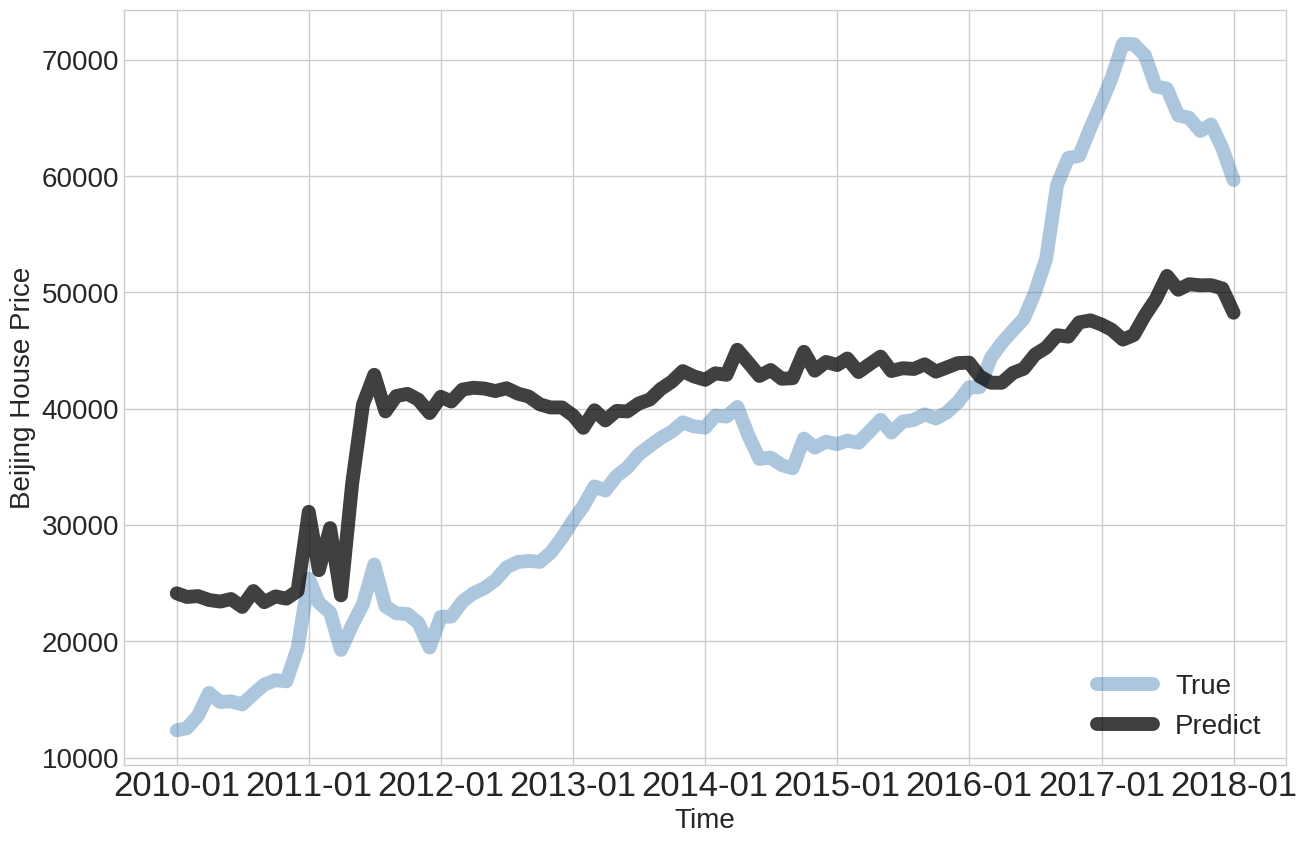

In [45]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10),dpi=100)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(y_avgreg.index[0],y_avgreg.index[-1],freq='12M'),fontsize=25)
plt.yticks(fontsize=20)
plt.plot(y_truth.index,y_truth['price'],color="steelblue",linewidth=10, alpha=.45,label='True')
plt.plot(y_avgreg.index, y_avgreg['regPrice'],color="black",linewidth=10,alpha=.75,label='Predict')
plt.legend(loc="lower right",fontsize=20)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Beijing House Price",fontsize=20)
plt.show()